# Comparative Analysis of Each model


importing Jupyter notebook from Head_file.ipynb
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.14126

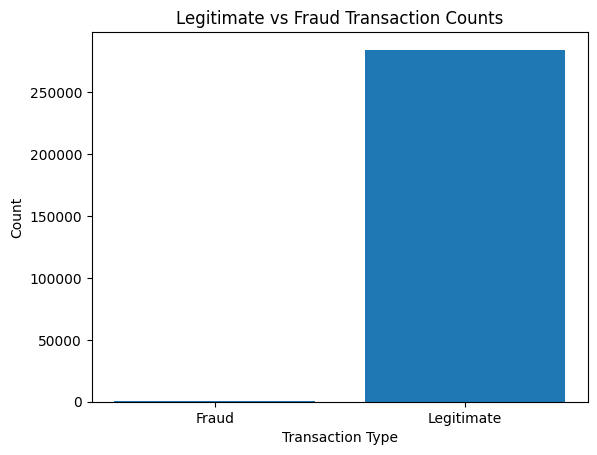

0.1727485630620034
Counter({0: 284315, 1: 492})
Counter({0: 492, 1: 492})
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     5686

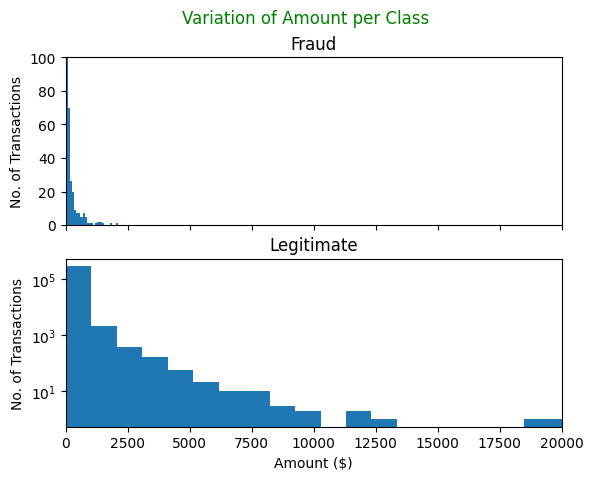

In [1]:
# importing Head_file to use the prepared dataset for model fitting.

import import_ipynb
import Head_file # this will import our head file

In [3]:
# importing all the required libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, matthews_corrcoef
from imblearn.metrics import specificity_score
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(Head_file.Data_undersampled, Head_file.class_undersampled, test_size=0.25, random_state=56)

classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=56)),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('XGBoost', XGBClassifier())
]

In [6]:
accuracy_scores = []
precision_scores = []
sensitivity_scores = []
specificity_scores = []
mcc_scores = []

In [7]:
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    sensitivity_scores.append(recall_score(y_test, y_pred))
    specificity_scores.append(specificity_score(y_test, y_pred))
    mcc_scores.append(matthews_corrcoef(y_test, y_pred))

C:\Users\swani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
import pandas as pd
metrics_df = pd.DataFrame({
    'Classifier': [name for name, _ in classifiers],
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': sensitivity_scores,
    'Specificity': specificity_scores,
    'MCC': mcc_scores
})

In [10]:
metrics_df

,Classifier,Accuracy,Precision,Recall,Specificity,MCC
0,Random Forest,0.939024,0.990991,0.887097,0.991803,0.883084
1,Gaussian Naive Bayes,0.902439,0.954545,0.846774,0.959016,0.810302
2,K-Nearest Neighbors,0.910569,0.947368,0.870968,0.950820,0.823969
3,Decision Tree,0.922764,0.933884,0.911290,0.934426,0.845800
4,Logistic Regression,0.943089,0.982456,0.903226,0.983607,0.889187
5,XGBoost,0.934959,0.982143,0.887097,0.983607,0.874177


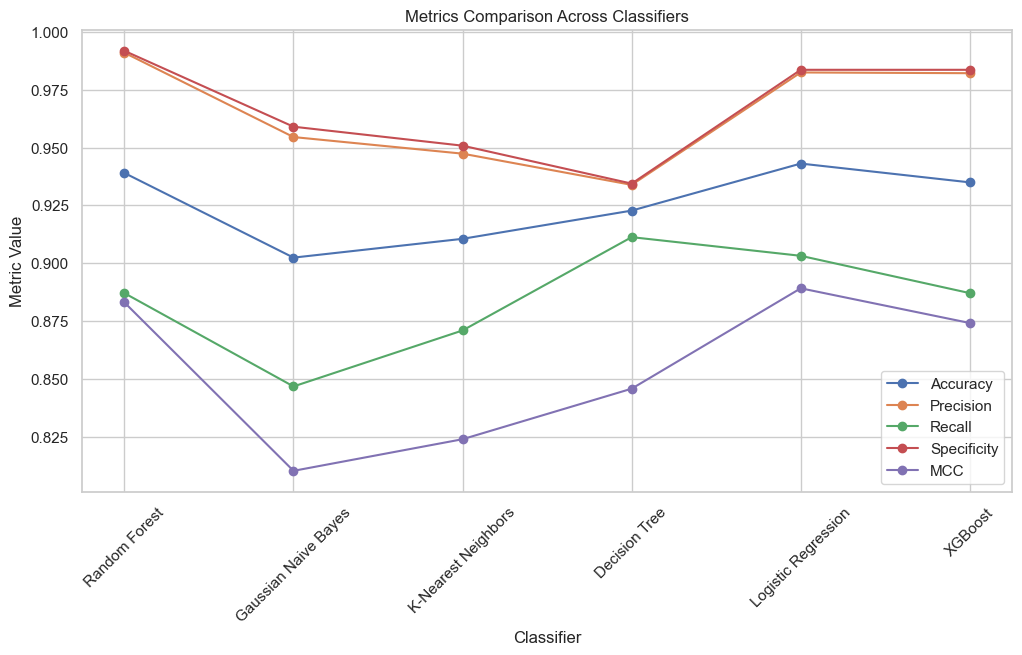

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'Specificity', 'MCC']):
    plt.plot(metrics_df['Classifier'], metrics_df[metric], label=metric, marker='o')

plt.title('Metrics Comparison Across Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()

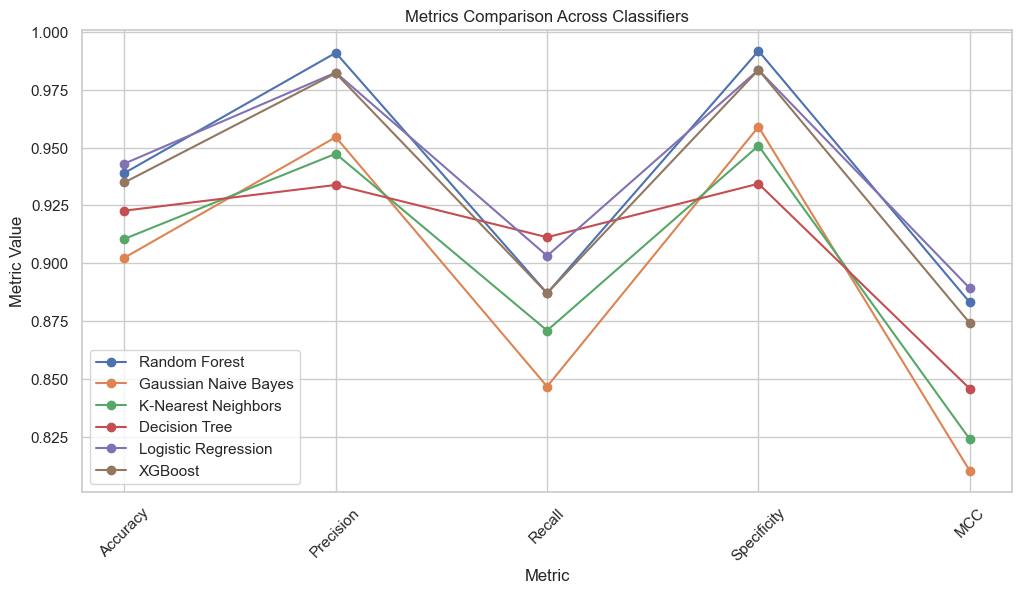

In [15]:
metrics_df_transposed = metrics_df.set_index('Classifier').T
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

for classifier in classifiers:
    plt.plot(metrics_df_transposed.index, metrics_df_transposed[classifier[0]], label=classifier[0], marker='o')

plt.title('Metrics Comparison Across Classifiers')
plt.xlabel('Metric')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()